In [ ]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

pd.options.display.max_columns = None # To display all the columns of a Dataframe.
warnings.filterwarnings('ignore') # Ignore any warnings and do not show them in the cell output.

MERGE DATASETS




In [ ]:
dataProvider = pd.read_csv('/content/drive/MyDrive/ds1/Train-1542865627584.csv') # Mapping Dataset
dataBeneficiary = pd.read_csv('/content/drive/MyDrive/ds1/Train_Beneficiarydata-1542865627584.csv') # Beneficiary Dataset
dataInpatient = pd.read_csv('/content/drive/MyDrive/ds1/Train_Inpatientdata-1542865627584.csv') # Inpatient Dataset
dataOutpatient = pd.read_csv('/content/drive/MyDrive/ds1/Train_Outpatientdata-1542865627584.csv') # Outpatient Dataset

In [ ]:
def combineDatasets(dataProvider, dataBeneficiary, dataInpatient, dataOutpatient):
    dataConcat = pd.concat([dataInpatient, dataOutpatient])
    dataMerge = pd.merge(left=dataConcat, right=dataBeneficiary, on='BeneID')
    dataFinal = pd.merge(left=dataMerge, right=dataProvider, on='Provider')
    return dataFinal

In [ ]:
data = combineDatasets(dataProvider, dataBeneficiary, dataInpatient, dataOutpatient)
print('Shape of the merged Dataset: ', data.shape)
print('Number of features in the merged Dataset: ', data.shape[1]-1)

Shape of the merged Dataset:  (558211, 55)
Number of features in the merged Dataset:  54


DATA PREP

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

In [ ]:
def dataCleanup(data):
    # RenalDiseaseIndicator column has two unique values: 0 and 'Y'. Replace the value of 'Y' with 1.
    data['RenalDiseaseIndicator'].replace(to_replace='Y', value=1, inplace=True)

    # 'ChronicCond_' columns contains two unique values: 1 and 2. Replace the value of 2 with 0 to indicate 1 as 'Yes' and 0 as 'No'
    for chronicCol in [col for col in list(data.columns) if 'Chronic' in col]:
        data[chronicCol].replace(to_replace=2, value=0, inplace=True)

    # Rename the column 'County' as 'Country'
    data.rename(columns={'County': 'Country'}, inplace=True)

    # Fill empty values of the 'DeductibleAmtPaid' feature as it is a numeric feature and has some empty values.
    data['DeductibleAmtPaid'].fillna(value=0, inplace=True)

    # Drop the columns having all null values
    data.dropna(axis=1, how='all', inplace=True)

    # Replace the class label 'PotentialFraud' values. Replace 'Yes' with 1 and 'No' with 0.
    if ('PotentialFraud' in data.columns):

        data['PotentialFraud'].replace(to_replace=['Yes', 'No'], value=[1, 0], inplace=True)


In [ ]:
dataCleanup(data)
print('Shape of the Dataset: ', data.shape)

Shape of the Dataset:  (558211, 54)


% OF NULL / EMPTY VALUES

In [ ]:
print('Percentage of missing values in the Dataframe (column wise):\n')
round((data.isna().sum()/data.shape[0])*100,2)

Percentage of missing values in the Dataframe (column wise):



BeneID                               0.00
ClaimID                              0.00
ClaimStartDt                         0.00
ClaimEndDt                           0.00
Provider                             0.00
InscClaimAmtReimbursed               0.00
AttendingPhysician                   0.27
OperatingPhysician                  79.50
OtherPhysician                      64.22
AdmissionDt                         92.75
ClmAdmitDiagnosisCode               73.86
DeductibleAmtPaid                    0.00
DischargeDt                         92.75
DiagnosisGroupCode                  92.75
ClmDiagnosisCode_1                   1.87
ClmDiagnosisCode_2                  35.04
ClmDiagnosisCode_3                  56.46
ClmDiagnosisCode_4                  70.52
ClmDiagnosisCode_5                  79.95
ClmDiagnosisCode_6                  84.88
ClmDiagnosisCode_7                  88.14
ClmDiagnosisCode_8                  90.43
ClmDiagnosisCode_9                  92.51
ClmDiagnosisCode_10               

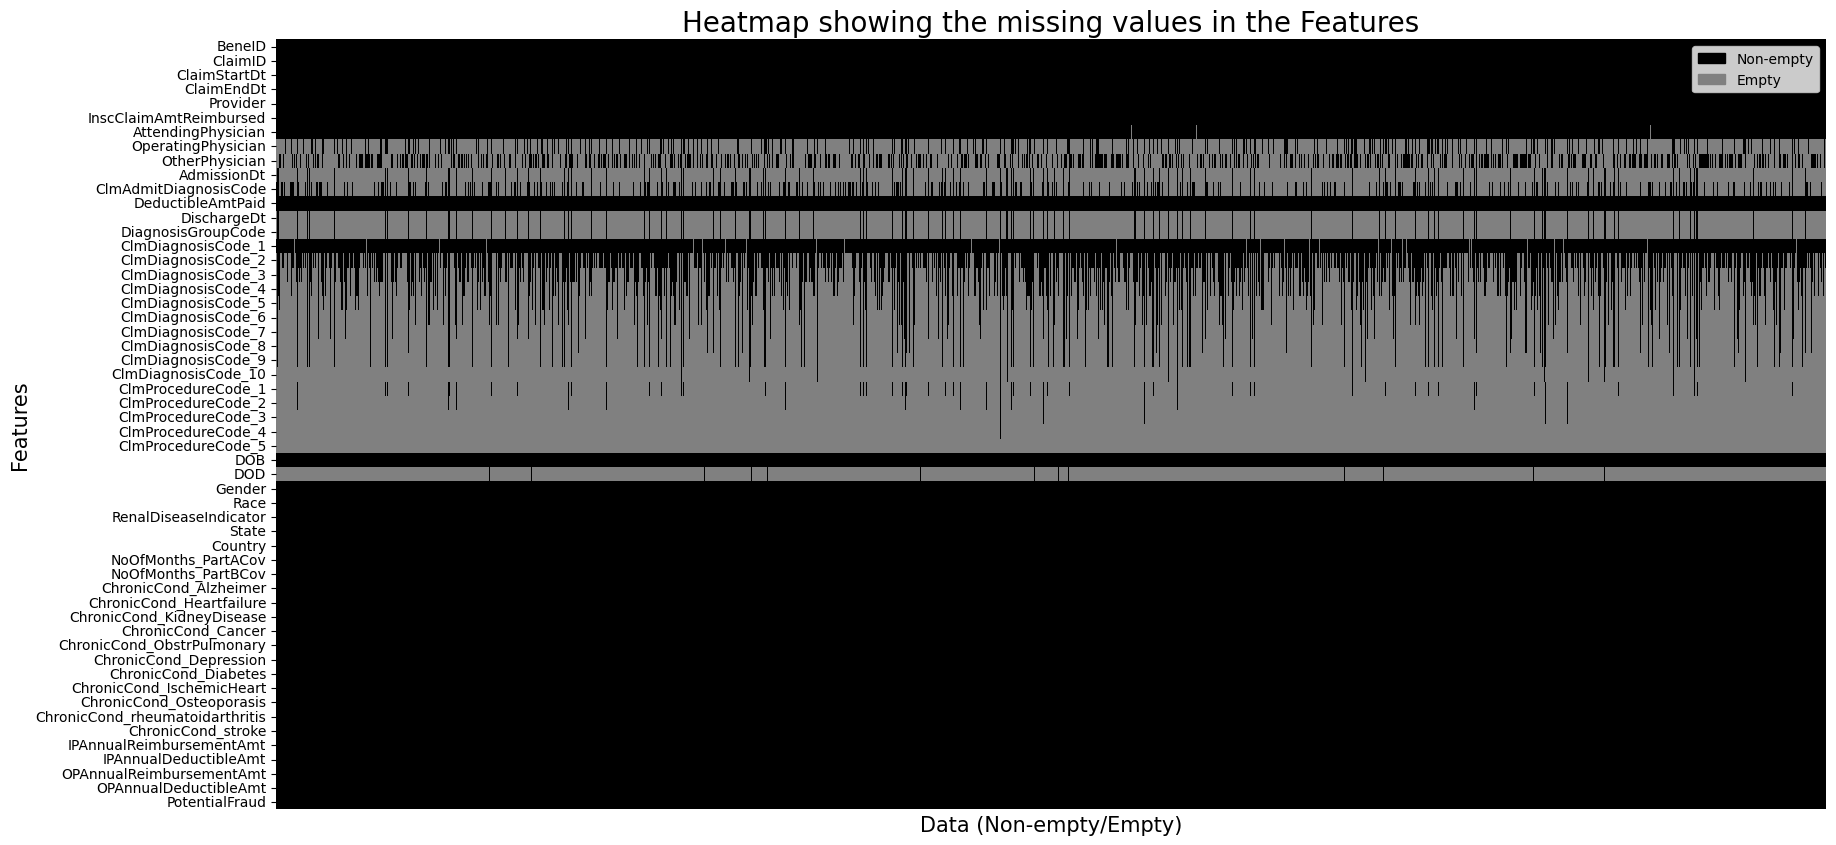

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.T.isnull(), cbar=False, yticklabels=True, xticklabels=False, cmap=['black', 'grey'])
blackPatch = mpatches.Patch(color='black', label='Non-empty')
greyPatch = mpatches.Patch(color='grey', label='Empty')
plt.legend(handles=[blackPatch, greyPatch], loc='upper right')
plt.xlabel('Data (Non-empty/Empty)', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Heatmap showing the missing values in the Features', fontsize=20)
plt.show()

In [ ]:
columnsToRemove = ['ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']
data.drop(columns=columnsToRemove, inplace=True)
print('Shape of the Dataset after removal of columns having more than 99% empty values: ', data.shape)


Shape of the Dataset after removal of columns having more than 99% empty values:  (558211, 51)


SPEARMAN

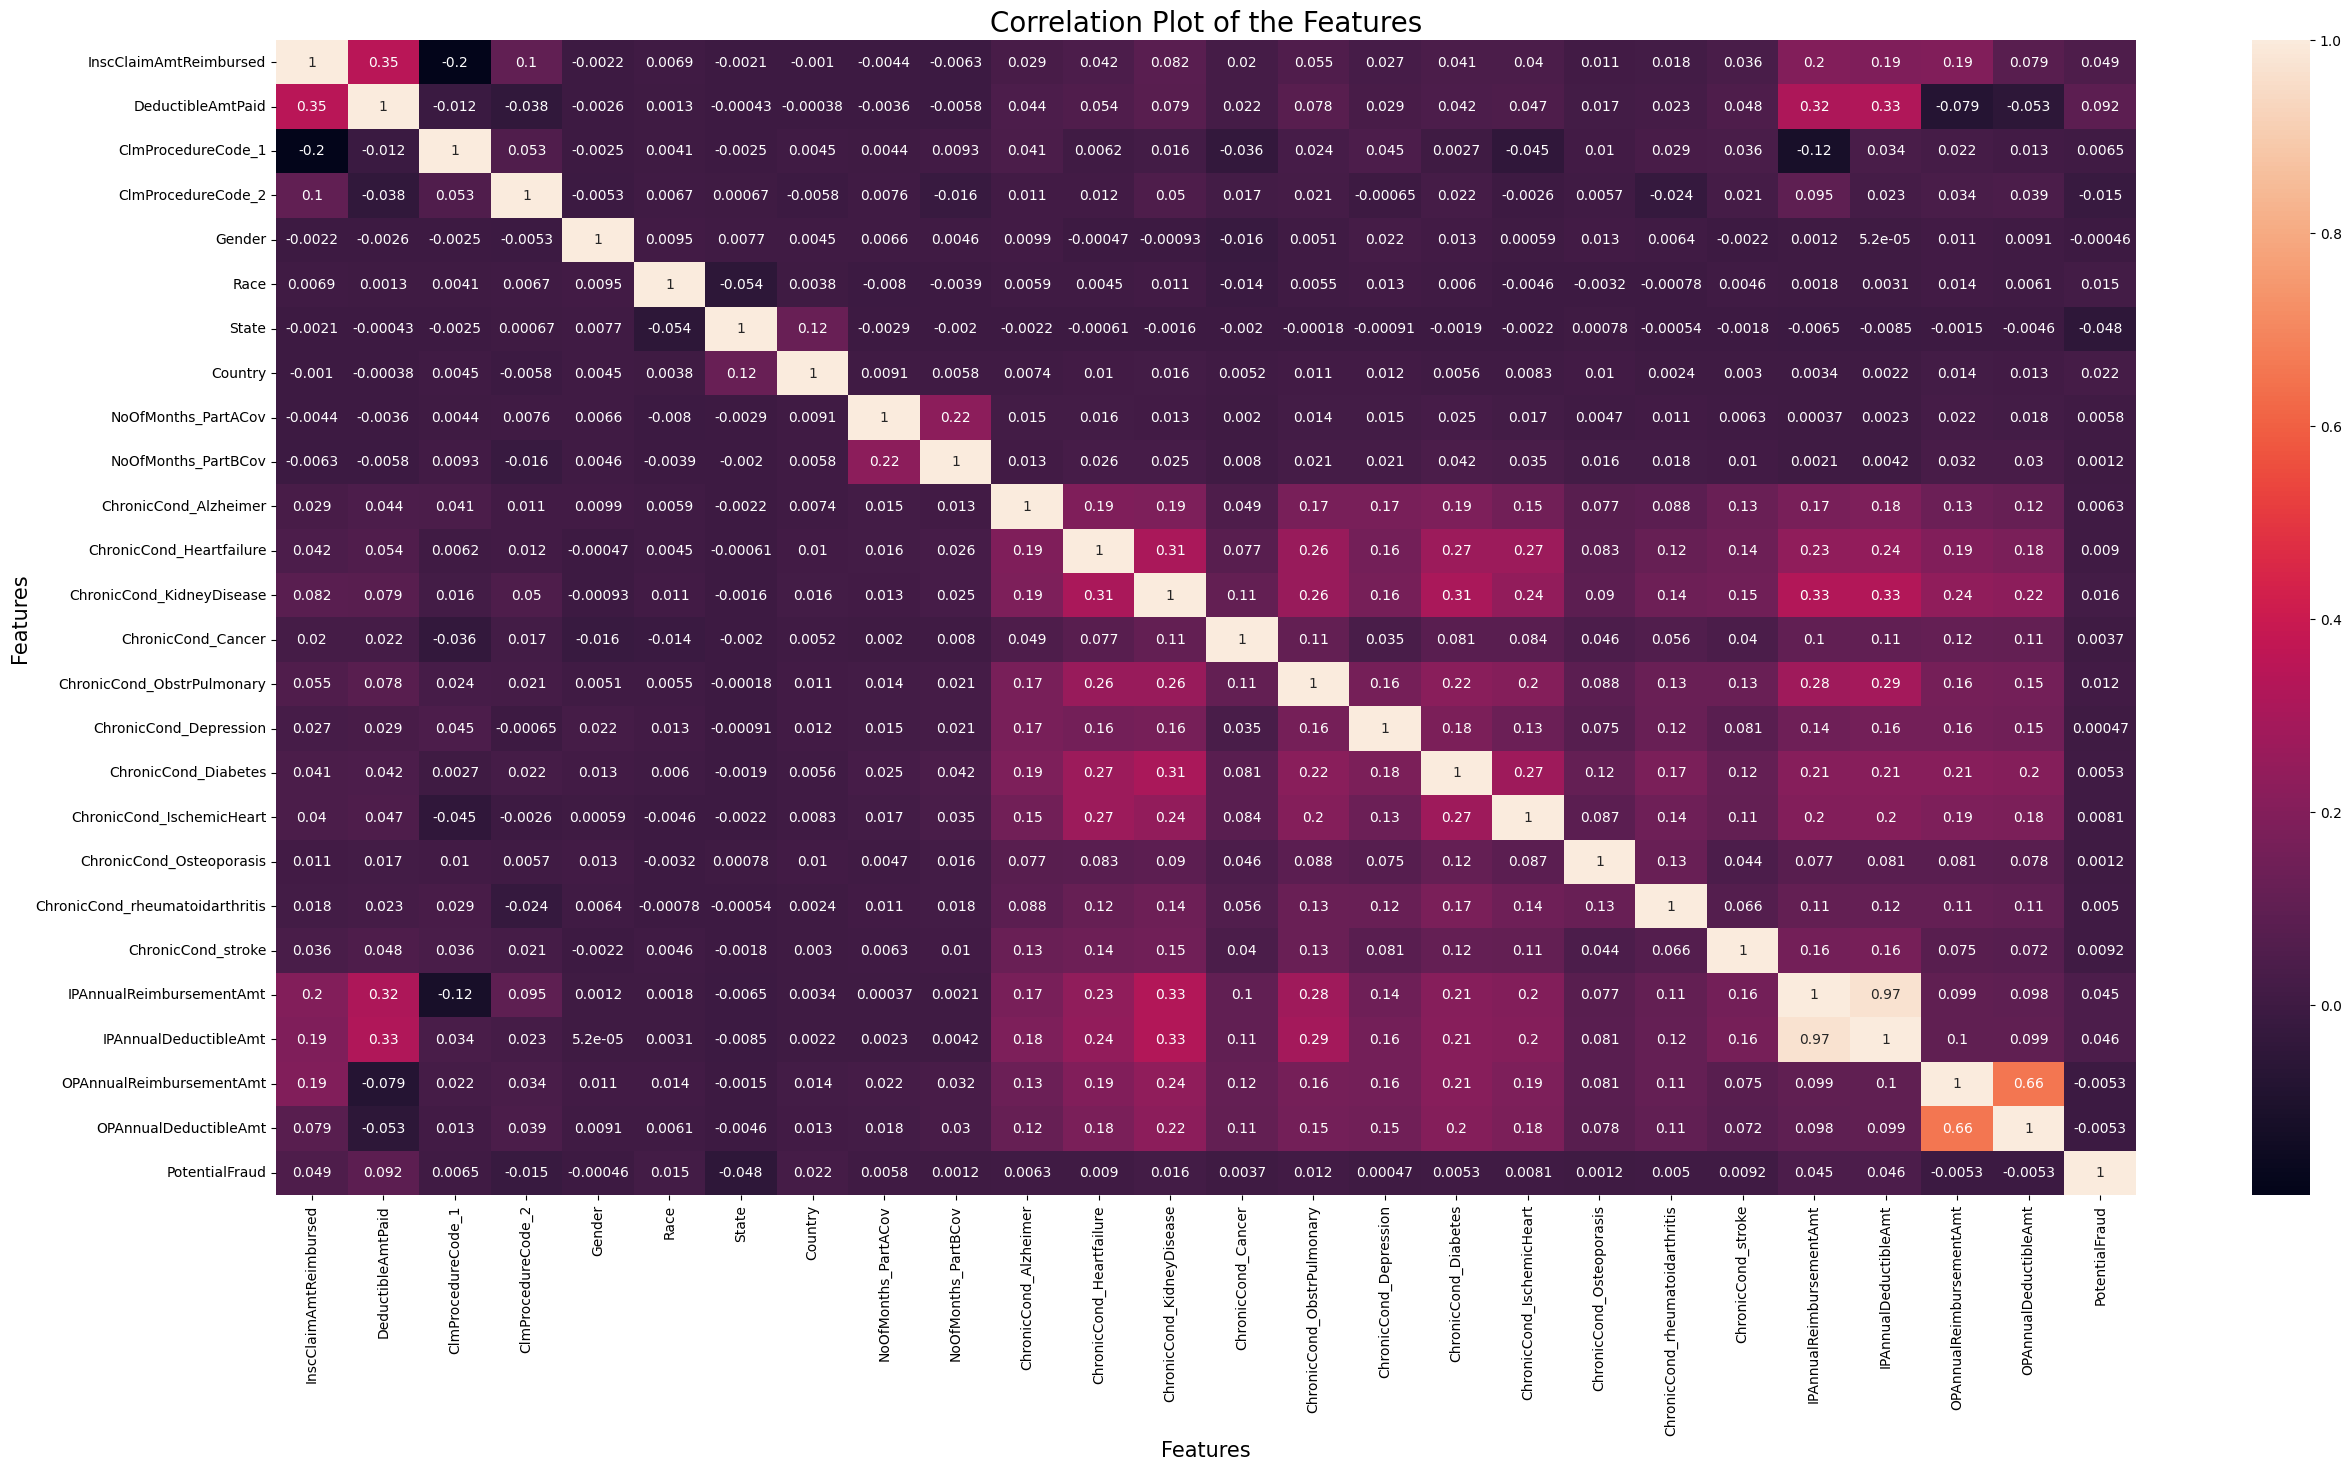

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(method='spearman'), annot=True)
plt.title('Correlation Plot of the Features', fontsize=20)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.show()

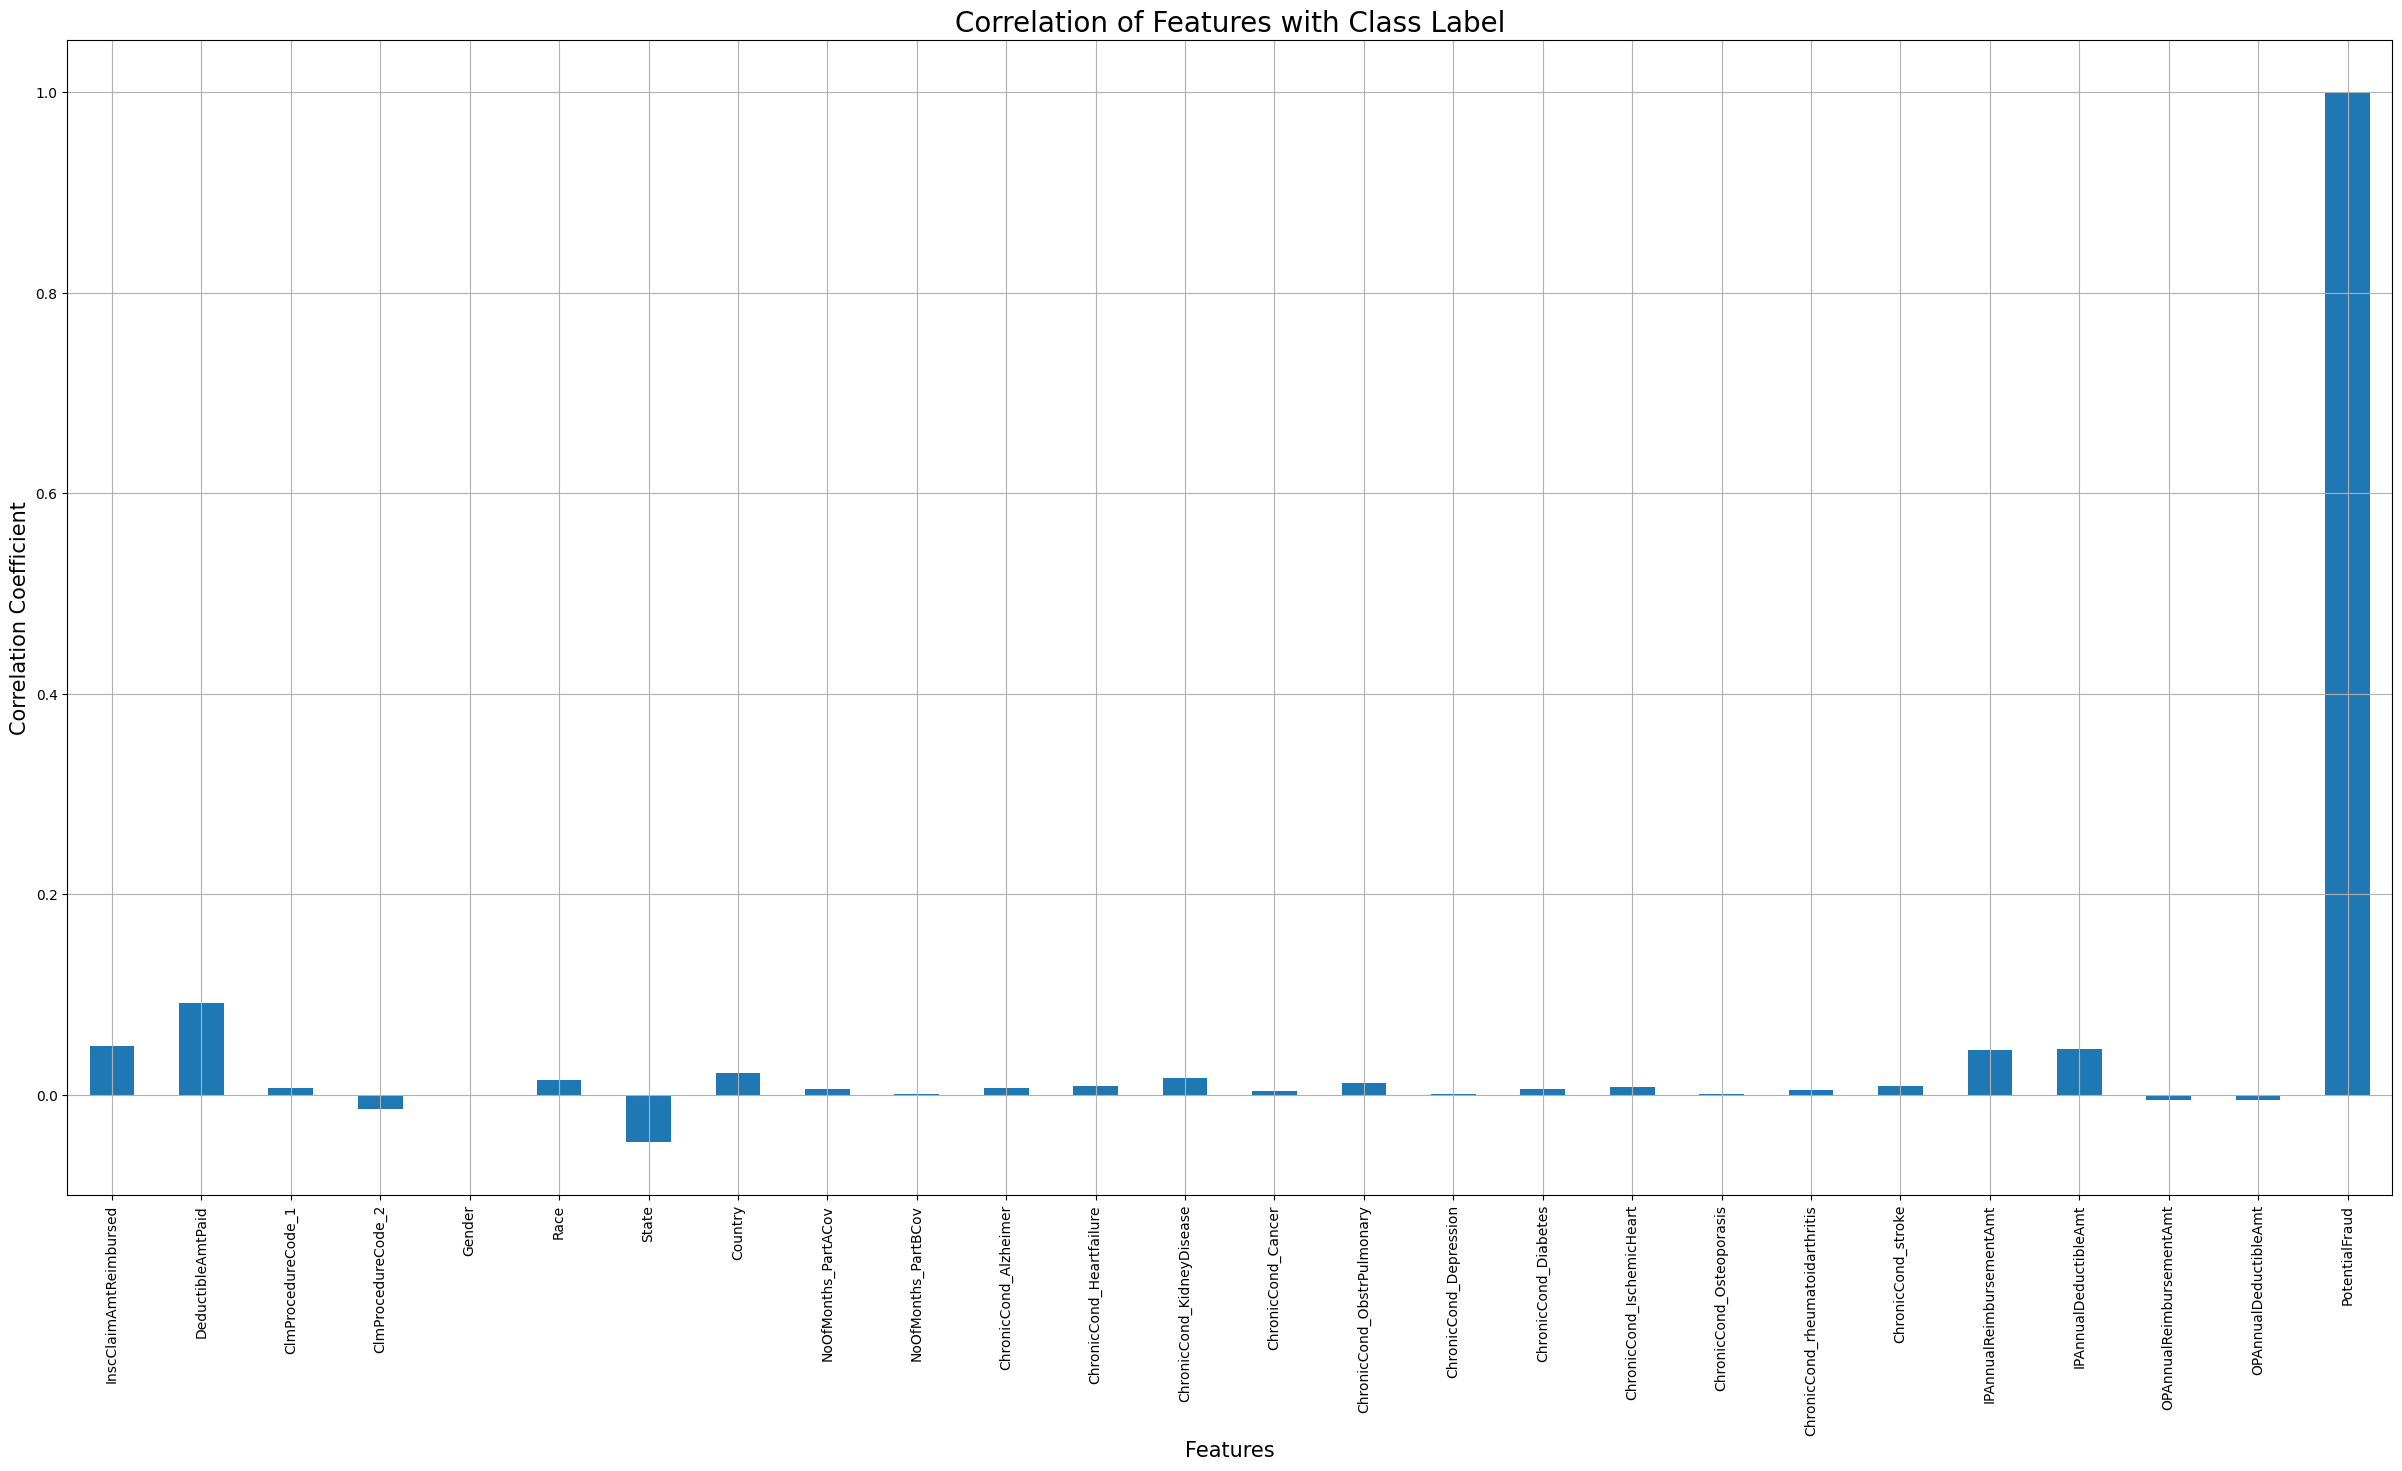

In [ ]:
plt.figure(figsize=(20,8))
data.corrwith(data['PotentialFraud'], method='spearman').plot.bar(figsize=(30,15), grid=True)
plt.title('Correlation of Features with Class Label', fontsize=20)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation Coefficient', fontsize=15)
plt.show()